In [11]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import coffea

In [12]:
prefix = './coffea/'

In [13]:
# MINIAOD + new x-cleaning + "no cut" for good_vtx
bkg_histo_v7 = util.load(f'{prefix}/background_v7_MINIAOD_NewXclean.coffea')[0]

In [14]:
# MINIAOD + new x-cleaning + new-new xsec (similar to sig v2) + MiniISO + "ID + OSSF" for good_vtx
bkg_histo_v7_1 = util.load(f'{prefix}/background_v7_MINIAOD_NewXclean_default_good_vtx.coffea')[0]

In [15]:
# MINIAOD + new x-cleaning + new-new xsec (similar to sig v2) + MiniISO + "v5" for good_vtx
bkg_histo_v7_2 = util.load(f'{prefix}/background_v7_MINIAOD_NewXclean_v5_good_vtx.coffea')[0]

In [16]:
# AOD + old x-cleaning
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}_AOD_OldXclean.coffea')[0]

### Plot: Legacy sample

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


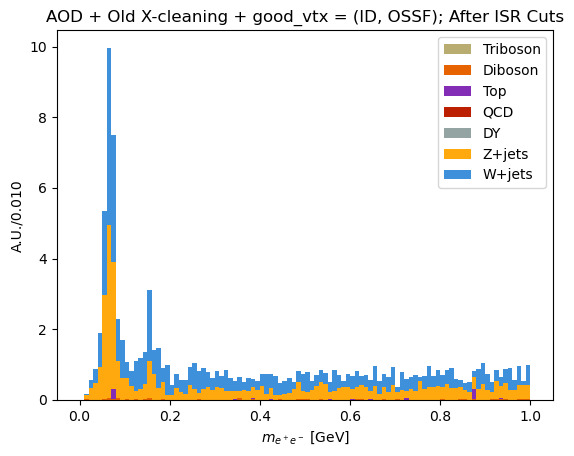

In [17]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# Plot for variables signal points
ptools.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, isLegacy = True)

plt.title('AOD + Old X-cleaning + good_vtx = (ID, OSSF); After ISR Cuts')

plt.legend()
plt.show()

Text(0.5, 1.0, 'All Background')

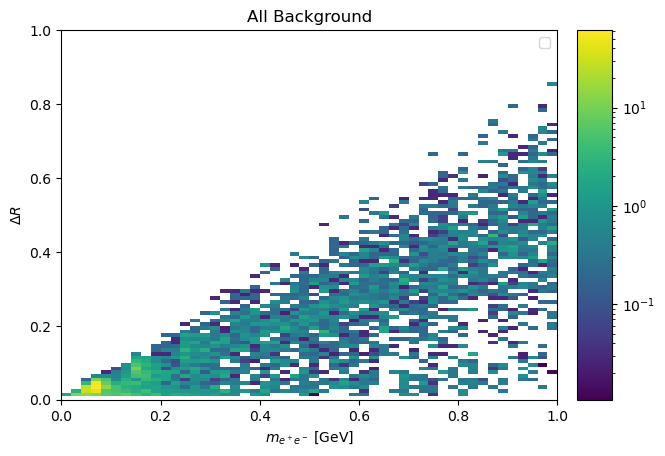

In [18]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_sel_vtx_dR',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, isLegacy = True)

#ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets'], isLegacy = True)

plt.title('All Background')

Text(0.5, 1.0, 'All Background')

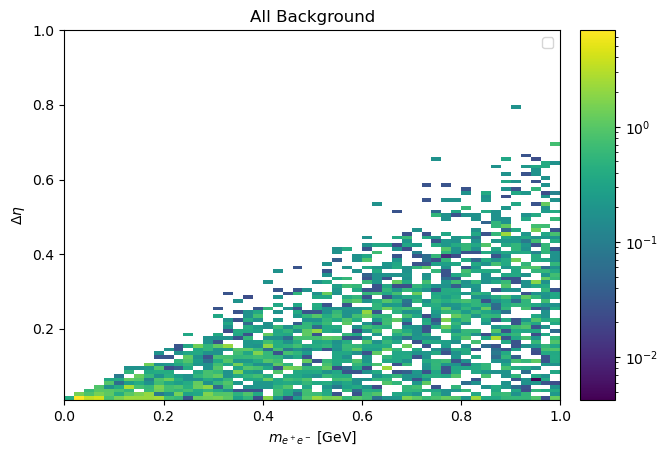

In [23]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_sel_vtx_dEta',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, isLegacy = True)

#ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets'], isLegacy = True)

plt.title('All Background')

Text(0.5, 1.0, 'All Background')

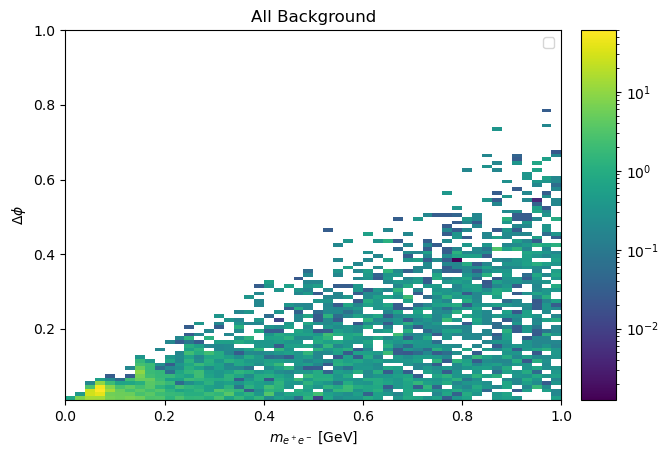

In [24]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_sel_vtx_dPhi',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, isLegacy = True)

#ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets'], isLegacy = True)

plt.title('All Background')

Text(0.5, 1.0, 'All Background')

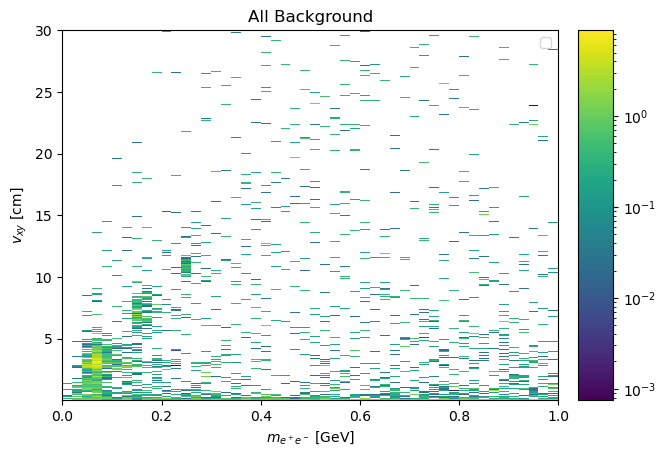

In [19]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_sel_vtx_vxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, isLegacy = True)

#ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets'], isLegacy = True)

plt.title('All Background')

Text(0.5, 1.0, 'All Background')

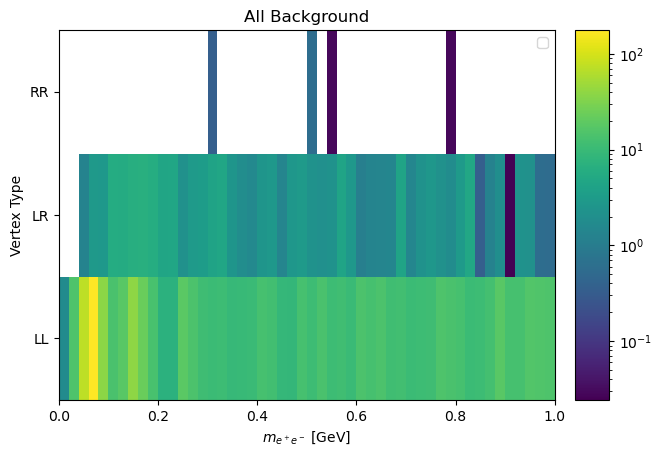

In [20]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_sel_vtx_type',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, isLegacy = True)

#ptools.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets'], isLegacy = True)

plt.title('All Background')

### Plot: new samples

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


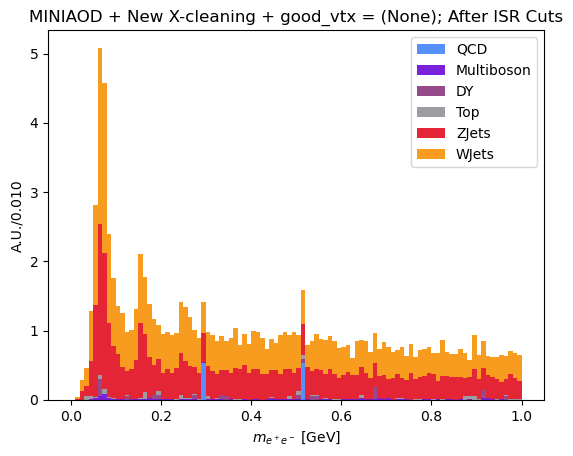

In [13]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# Plot for variables signal points
ptools.plot_bkg_1d(ax, bkg_histo_v7, plot_dict, style_dict, isLegacy = False)

plt.title('MINIAOD + New X-cleaning + good_vtx = (None); After ISR Cuts')

plt.legend()
plt.show()

Text(0.5, 1.0, 'W/Z+jets')

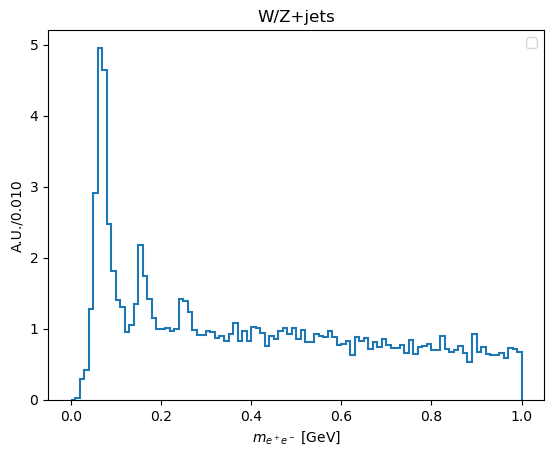

In [14]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)
plt.title('W/Z+jets')

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


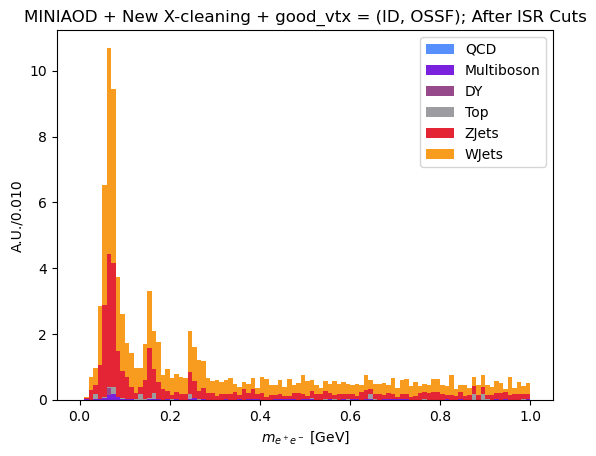

In [15]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# Plot for variables signal points
ptools.plot_bkg_1d(ax, bkg_histo_v7_1, plot_dict, style_dict, isLegacy = False)

plt.title('MINIAOD + New X-cleaning + good_vtx = (ID, OSSF); After ISR Cuts')

plt.legend()
plt.show()

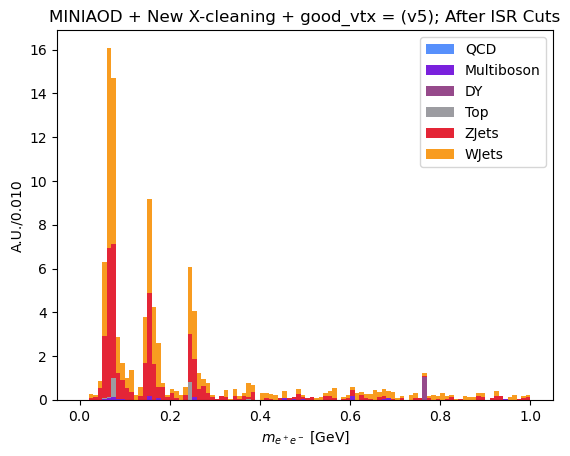

In [16]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# Plot for variables signal points
ptools.plot_bkg_1d(ax, bkg_histo_v7_2, plot_dict, style_dict, isLegacy = False)

plt.title('MINIAOD + New X-cleaning + good_vtx = (v5); After ISR Cuts')

plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Text(0.5, 1.0, 'W/Z+jets')

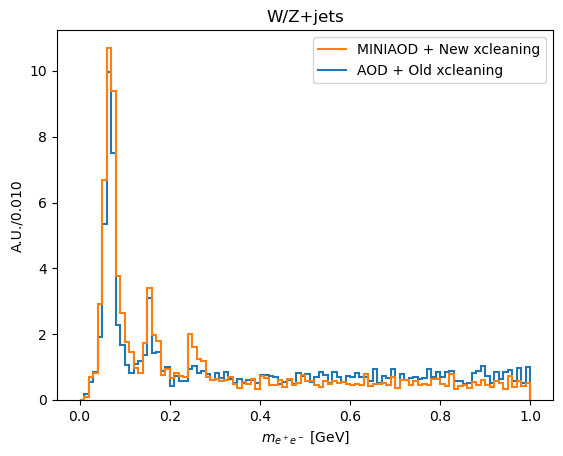

In [17]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
style_dict['label'] = 'AOD + Old xcleaning'
ptools.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict, processes = ['W+jets', 'Z+jets'], isLegacy = True)

style_dict['label'] = 'MINIAOD + New xcleaning'
ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7_1, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)

#style_dict['label'] = 'MINIAOD + New xcleaning + good_vtx = (v5)'
#ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7_2, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)

plt.title('W/Z+jets')

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Text(0.5, 1.0, 'W+jets')

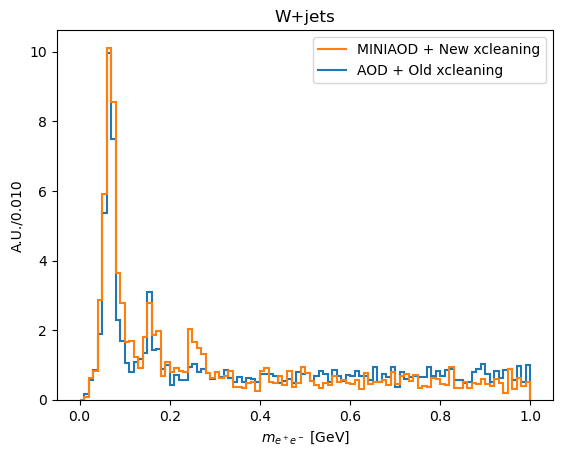

In [18]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
style_dict['label'] = 'AOD + Old xcleaning'
ptools.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict, processes = ['W+jets'], isLegacy = True)

style_dict['label'] = 'MINIAOD + New xcleaning'
ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7_1, plot_dict, style_dict, processes = ['WJets'], isLegacy = False)

#style_dict['label'] = 'MINIAOD + New xcleaning + good_vtx = (v5)'
#ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7_2, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)

plt.title('W+jets')

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Text(0.5, 1.0, 'Z+jets')

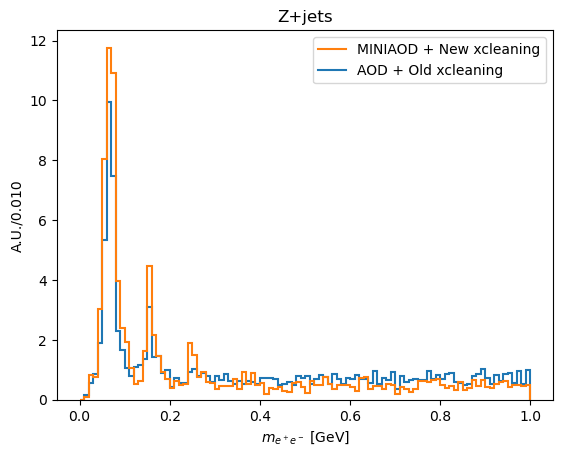

In [19]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
style_dict['label'] = 'AOD + Old xcleaning'
ptools.plot_bkg_1d_stacked(ax, bkg_histos, plot_dict, style_dict, processes = ['Z+jets'], isLegacy = True)

style_dict['label'] = 'MINIAOD + New xcleaning'
ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7_1, plot_dict, style_dict, processes = ['ZJets'], isLegacy = False)

#style_dict['label'] = 'MINIAOD + New xcleaning + good_vtx = (v5)'
#ptools.plot_bkg_1d_stacked(ax, bkg_histo_v7_2, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)

plt.title('Z+jets')

Text(0.5, 1.0, 'All Background')

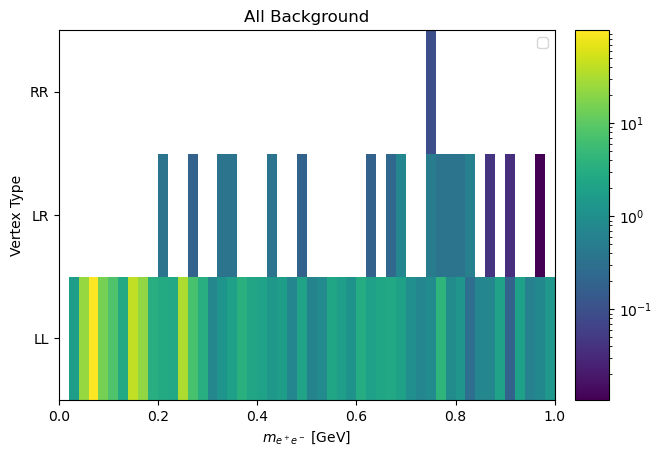

In [24]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_sel_vtx_type',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

ptools.plot_bkg_2D(ax, bkg_histo_v7_2, plot_dict, style_2d_dict, isLegacy = False)

#ptools.plot_bkg_2D(ax, bkg_histo_v7_2, plot_dict, style_2d_dict, processes = ['ZJets', 'WJets'], isLegacy = False)

plt.title('All Background')